## Passo 1: fornecer um conjunto de dados de preços histórico dos ativos.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Códigos dos principais ativos da Ibovespa B3

#### WEGE3, BRFS3, ABEV3, BBAS3, PETR3, VALE3, EQTL3, RENT3, MGLU3, RAIL3, CYRE3, SUZB3, RADL3, VIVT3, ENEV3 

In [2]:
tickers = ['WEGE3.SA', 'BRFS3.SA', 'ABEV3.SA', 'BBAS3.SA', 'PETR3.SA', 'VALE3.SA', 'EQTL3.SA', 'RENT3.SA', 
           'MGLU3.SA', 'RAIL3.SA', 'CYRE3.SA', 'SUZB3.SA', 'RADL3.SA', 'VIVT3.SA', 'ENEV3.SA']

In [3]:
ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  15 of 15 completed


In [4]:
#Preço diário de fechamento do mercado
preços = ohlc["Adj Close"].dropna(how="all")
preços.tail()

,ABEV3.SA,BBAS3.SA,BRFS3.SA,CYRE3.SA,ENEV3.SA,EQTL3.SA,MGLU3.SA,PETR3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SUZB3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2022-01-20,14.49,31.200001,23.360001,15.23,12.94,22.260000,6.65,34.470001,20.450001,17.480000,54.130001,60.310001,86.709999,48.400002,30.740000
2022-01-21,14.69,31.200001,22.690001,15.72,12.93,22.139999,6.90,34.590000,21.000000,16.980000,54.900002,59.590000,84.910004,48.360001,30.610001
2022-01-24,14.70,31.350000,23.459999,15.49,12.75,21.760000,6.39,34.650002,21.000000,16.629999,53.619999,58.220001,83.870003,48.080002,29.900000
2022-01-25,15.07,32.160000,23.250000,16.33,12.89,22.180000,6.72,35.799999,21.600000,16.820000,55.750000,56.709999,84.059998,48.450001,30.200001
2022-01-26,15.00,31.850000,22.820000,17.01,13.07,22.160000,6.75,36.849998,21.969999,16.870001,57.880001,55.639999,84.300003,47.779999,30.740000


In [5]:
preços.head()

,ABEV3.SA,BBAS3.SA,BRFS3.SA,CYRE3.SA,ENEV3.SA,EQTL3.SA,MGLU3.SA,PETR3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SUZB3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2000-01-03,NaN,1.232178,764.839600,NaN,NaN,NaN,NaN,3.015229,NaN,NaN,NaN,NaN,1.865043,8.078979,0.126050
2000-01-04,NaN,1.173574,759.910034,NaN,NaN,NaN,NaN,2.846008,NaN,NaN,NaN,NaN,1.820637,7.860175,0.121626
2000-01-05,0.321626,1.185596,759.910034,NaN,NaN,NaN,NaN,2.884468,NaN,NaN,NaN,NaN,1.820637,7.947696,0.121626
2000-01-06,0.305322,1.202125,740.169739,NaN,NaN,NaN,NaN,2.861392,0.004872,NaN,NaN,NaN,1.820637,8.122738,0.110569
2000-01-07,0.305322,1.175077,740.169739,NaN,NaN,NaN,NaN,2.884468,0.004872,NaN,NaN,NaN,1.887246,8.163135,0.110569


In [6]:
preços.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5528 entries, 2000-01-03 to 2022-01-26
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ABEV3.SA  5419 non-null   float64
 1   BBAS3.SA  5451 non-null   float64
 2   BRFS3.SA  3998 non-null   float64
 3   CYRE3.SA  4406 non-null   float64
 4   ENEV3.SA  3498 non-null   float64
 5   EQTL3.SA  3415 non-null   float64
 6   MGLU3.SA  2662 non-null   float64
 7   PETR3.SA  5465 non-null   float64
 8   RADL3.SA  3727 non-null   float64
 9   RAIL3.SA  1688 non-null   float64
 10  RENT3.SA  4134 non-null   float64
 11  SUZB3.SA  1075 non-null   float64
 12  VALE3.SA  5518 non-null   float64
 13  VIVT3.SA  5518 non-null   float64
 14  WEGE3.SA  3791 non-null   float64
dtypes: float64(15)
memory usage: 691.0 KB


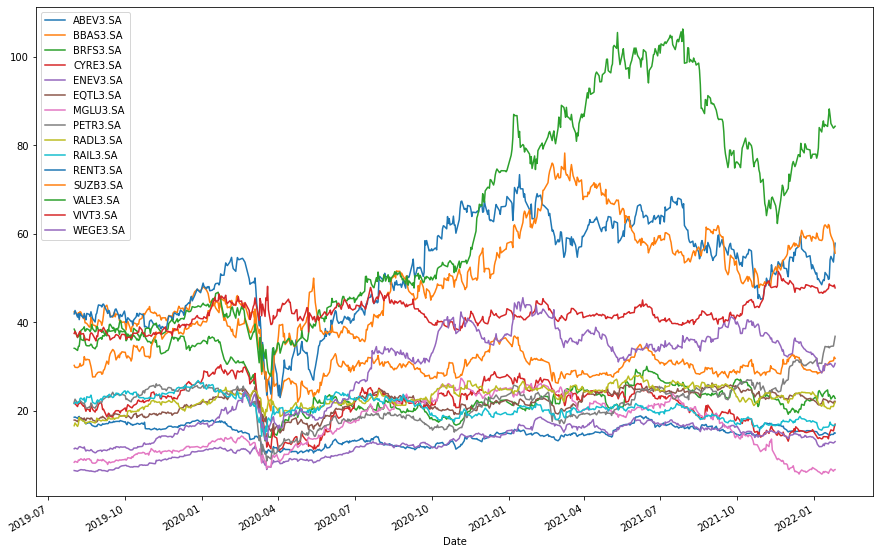

In [7]:
preços[preços.index >= "2019-08-01"].plot(figsize=(15,10));

## Passo 2: Estimando os retornos esperados e a matriz de covariância


In [8]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [9]:
# Retorno Esperado - calculado pelo CAPM - Ri=Rf+βi(E(Rm)−Rf)
from pypfopt import expected_returns

retornoEsperado = expected_returns.capm_return(preços)
retornoEsperado

ABEV3.SA    0.066572
BBAS3.SA    0.114917
BRFS3.SA    0.089586
CYRE3.SA    0.117071
ENEV3.SA    0.108281
EQTL3.SA    0.084337
MGLU3.SA    0.140380
PETR3.SA    0.116893
RADL3.SA    0.203699
RAIL3.SA    0.145126
RENT3.SA    0.120505
SUZB3.SA    2.957953
VALE3.SA    0.098244
VIVT3.SA    0.064712
WEGE3.SA    0.072123
Name: mkt, dtype: float64

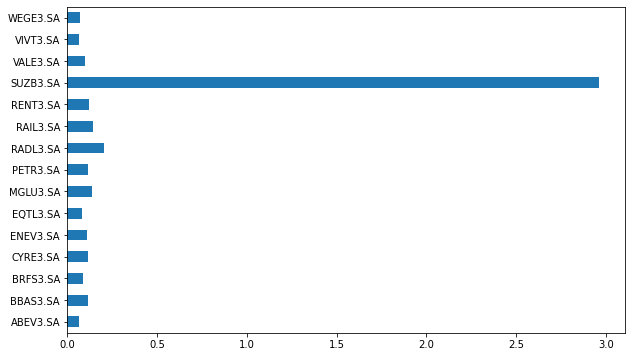

In [10]:
retornoEsperado.plot.barh(figsize=(10,6));

## Estimando a matriz de covariância

In [11]:
# Esta é a matriz de covariância
from pypfopt import risk_models
from pypfopt import plotting

matrizCov = risk_models.sample_cov(preços, frequency=252)
matrizCov

,ABEV3.SA,BBAS3.SA,BRFS3.SA,CYRE3.SA,ENEV3.SA,EQTL3.SA,MGLU3.SA,PETR3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SUZB3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
ABEV3.SA,0.089132,0.038995,0.023952,0.037129,0.026989,0.023927,0.034735,0.039851,0.017980,0.043687,0.040442,-0.025557,0.033680,0.022575,0.021066
BBAS3.SA,0.038995,0.189515,0.044641,0.088000,0.046460,0.050037,0.086937,0.096255,0.034404,0.103922,0.085267,-0.025809,0.067239,0.039834,0.033883
BRFS3.SA,0.023952,0.044641,0.177245,0.043075,0.030296,0.025328,0.048319,0.042680,0.039038,0.054814,0.048728,0.016110,0.037537,0.017903,0.025503
CYRE3.SA,0.037129,0.088000,0.043075,0.256250,0.055986,0.055430,0.095854,0.076151,0.036637,0.102740,0.100079,-0.056023,0.061495,0.025869,0.041179
ENEV3.SA,0.026989,0.046460,0.030296,0.055986,0.301822,0.033702,0.050666,0.056137,0.031269,0.054811,0.048703,0.006307,0.049950,0.023068,0.035765
EQTL3.SA,0.023927,0.050037,0.025328,0.055430,0.033702,0.143449,0.040027,0.045771,0.026257,0.052255,0.046469,0.001333,0.032387,0.019783,0.028890
MGLU3.SA,0.034735,0.086937,0.048319,0.095854,0.050666,0.040027,0.355743,0.083426,0.040338,0.122893,0.076781,0.013775,0.064250,0.034269,0.050449
PETR3.SA,0.039851,0.096255,0.042680,0.076151,0.056137,0.045771,0.083426,0.191484,0.039291,0.096445,0.077040,-0.008225,0.093919,0.037269,0.035791
RADL3.SA,0.017980,0.034404,0.039038,0.036637,0.031269,0.026257,0.040338,0.039291,0.881184,0.041107,0.040543,0.000835,0.020544,0.019568,0.021722
RAIL3.SA,0.043687,0.103922,0.054814,0.102740,0.054811,0.052255,0.122893,0.096445,0.041107,0.289418,0.087847,0.013828,0.056932,0.040884,0.053340


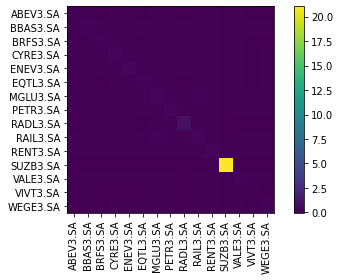

In [12]:
plotting.plot_covariance(matrizCov, plot_correlation=False);

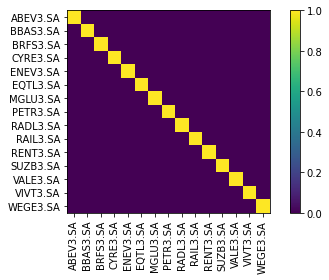

In [13]:
Estimativa_reducao = risk_models.CovarianceShrinkage(preços).ledoit_wolf()
plotting.plot_covariance(Estimativa_reducao, plot_correlation=True);

## Passo 3: Portfólio que maximiza o índice de Sharpe

In [14]:
# Pesos de cada Ativo - para maximizar o Índice de Sharpe
from pypfopt import EfficientFrontier

ef = EfficientFrontier (retornoEsperado,Estimativa_reducao)
pesos = ef.max_sharpe() #--> como são atribuídos os pesos? Por simulação ou aleatóriamente?

cleaned_pesos = ef.clean_weights()
ef.save_weights_to_file("pesos.txt")  # saves to file
cleaned_pesos

OrderedDict([('ABEV3.SA', 0.01109),
             ('BBAS3.SA', 0.0226),
             ('BRFS3.SA', 0.01657),
             ('CYRE3.SA', 0.02311),
             ('ENEV3.SA', 0.02102),
             ('EQTL3.SA', 0.01532),
             ('MGLU3.SA', 0.02866),
             ('PETR3.SA', 0.02307),
             ('RADL3.SA', 0.04373),
             ('RAIL3.SA', 0.02979),
             ('RENT3.SA', 0.02393),
             ('SUZB3.SA', 0.69945),
             ('VALE3.SA', 0.01863),
             ('VIVT3.SA', 0.01064),
             ('WEGE3.SA', 0.01241)])

## O desempenho esperado desse portfólio é:

In [15]:
ef.portfolio_performance(verbose=True)

Expected annual return: 210.6%
Annual volatility: 80.1%
Sharpe Ratio: 2.60


(2.1062698569799054, 0.8012545229368263, 2.6037542344636404)

## Passo 4: Gráfico da Fronteira Eficiente e Ponto ótimo

In [16]:
from pypfopt import CLA, plotting

cla = CLA(retornoEsperado,Estimativa_reducao)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 198.6%
Annual volatility: 75.5%
Sharpe Ratio: 2.60


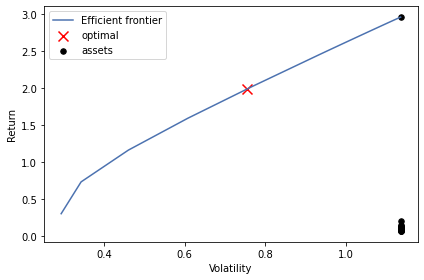

In [17]:
ax = plotting.plot_efficient_frontier(cla, showfig=True)

C:\Users\flavi\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:1279: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


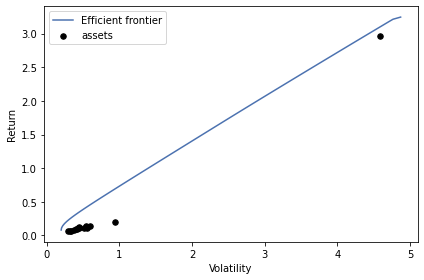

In [18]:
ef = EfficientFrontier(retornoEsperado, matrizCov, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0] >= 0.2)
ef.add_constraint(lambda w: w[2] == 0.15)
ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()